In [74]:
import pymysql
#连接数据库
db = pymysql.connect(host="rm-uf6ua72q394fq6v9q9o.mysql.rds.aliyuncs.com",port=3306,user="data_analyse",password="et_data_analyse",database="ccnu_main_test",charset="utf8")
#使用cursor()方法创建一个游标对象
cursor = db.cursor()
#cursor=pymysql.cursors.DictCursor

#sql查询按活动浏览量降序排列
sql='''
select id,a
from et_activity
where scan_num >=0
and
date(enroll_start_time) between '2019-09-01' and '2019-11-30';
'''
#使用execute()方法执行SQL语句,提取前20名
cursor.execute(sql)
data = cursor.fetchmany(20)
print(data)
db.rollback()

#关闭游标和数据库的连接
cursor.close()
db.close()

((1422, 4487), (1425, 529), (1427, 356), (1430, 2401), (1431, 744), (1432, 432), (1433, 4748), (1436, 273), (1437, 5), (1438, 46), (1450, 24), (1451, 2), (1465, 41), (1466, 305), (1471, 2162), (1473, 693), (1474, 3428), (1475, 5137), (1476, 1642), (1477, 1459))


In [75]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
#折线图和柱形图

#获取周数，活动数量
acti_id=[]
acti_scan=[]
for id in data: 
    acti_id.append(id[0])
for scan in data:
    acti_scan.append(scan[1])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[4487, 529, 356, 2401, 744, 432, 4748, 273, 5, 46, 24, 2, 41, 305, 2162, 693, 3428, 5137, 1642, 1459]


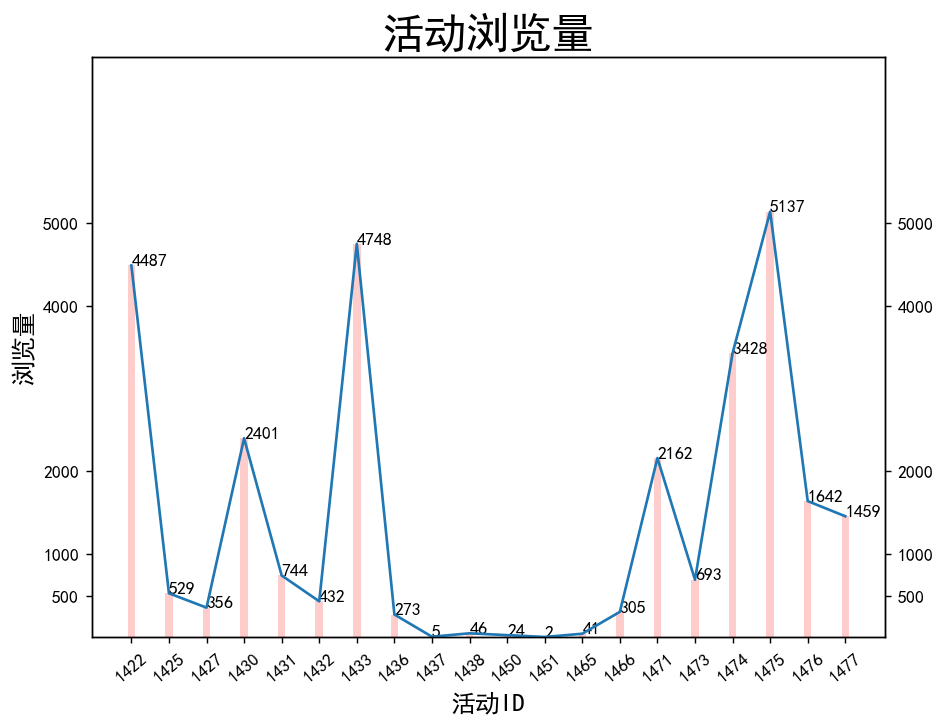

In [77]:
fig=plt.figure(dpi=128,figsize=(8,6))
xlist=list(range(len(acti_scan)))#活动id编号，创建整数列表

print(xlist)
print(acti_scan)
plt.title("活动浏览量",fontsize=24)
plt.xlabel("活动ID",fontsize=14)#设置轴的名称
plt.ylabel("浏览量",fontsize=14)
plt.ylim(0,7000)#设置y值界限
plt.xticks(rotation=40)# x轴标签竖直
plt.xticks(xlist)
plt.yticks([500,1000,2000,4000,5000])


#text()添加数据标签
for x,y in zip(xlist,acti_scan):
    plt.text(x,y+1.5,'%.0f'%y,fontsize=10)
    
#绘制柱形图
plt2 = plt.twinx()  # 组合图
plt2.set_ylim(0,7000)
plt2.set_yticks([500,1000,2000,4000,5000])
plt2.bar(xlist,acti_scan, alpha=0.2, width=0.2,color='r')
plt2.set_xticklabels(acti_id)#自定义刻度标签

plt.plot(xlist,acti_scan)
plt.show()






In [ ]:

#绘制柱形图
plt2 = plt.twinx()  # 组合图
plt2.set_ylim(0,7000)
plt2.set_yticks([500,1000,2000,4000,5000])
plt2.bar(xlist,acti_scan, alpha=0.2, width=0.5,color='r')
